Problem 1 for the Data Set : Shoesales.csv 
You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.
Problem 2 for the Data Set SoftDrink.csv :
You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drink has been given to you from January 1980 to July 1995.
Please do perform the following questions on each of these two data sets separately.
1.	Read the data as an appropriate Time Series data and plot the data.
2.	Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
3.	Split the data into training and test. The test data should start in 1991.
4.	Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.
5.	Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.
6.	Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
7.	Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
8.	Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
9.	Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
10.	Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels

## 1.	Read the data as an appropriate Time Series data and plot the data.

In [2]:
shoe=pd.read_csv('Shoe-Sales.csv')

In [3]:
shoe.head(5)

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


In [4]:
shoe.tail(5)

,YearMonth,Shoe_Sales
182,1995-03,188
183,1995-04,195
184,1995-05,189
185,1995-06,220
186,1995-07,274


In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
shoe['Time_Stamp'] = date
shoe.head()

,YearMonth,Shoe_Sales,Time_Stamp
0,1980-01,85,1980-01-31
1,1980-02,89,1980-02-29
2,1980-03,109,1980-03-31
3,1980-04,95,1980-04-30
4,1980-05,91,1980-05-31


In [7]:
shoe.set_index(keys='Time_Stamp',drop=True,inplace=True)
shoe.head()

,YearMonth,Shoe_Sales
Time_Stamp,,
1980-01-31,1980-01,85
1980-02-29,1980-02,89
1980-03-31,1980-03,109
1980-04-30,1980-04,95
1980-05-31,1980-05,91


In [8]:
shoe.drop(labels=['YearMonth'],axis=1,inplace=True)
shoe.head()

,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


In [9]:
softdrink=pd.read_csv('SoftDrink.csv')
softdrink.head(5)

,YearMonth,SoftDrinkProduction
0,1980-01,1954
1,1980-02,2302
2,1980-03,3054
3,1980-04,2414
4,1980-05,2226


In [10]:
from pylab import rcParams

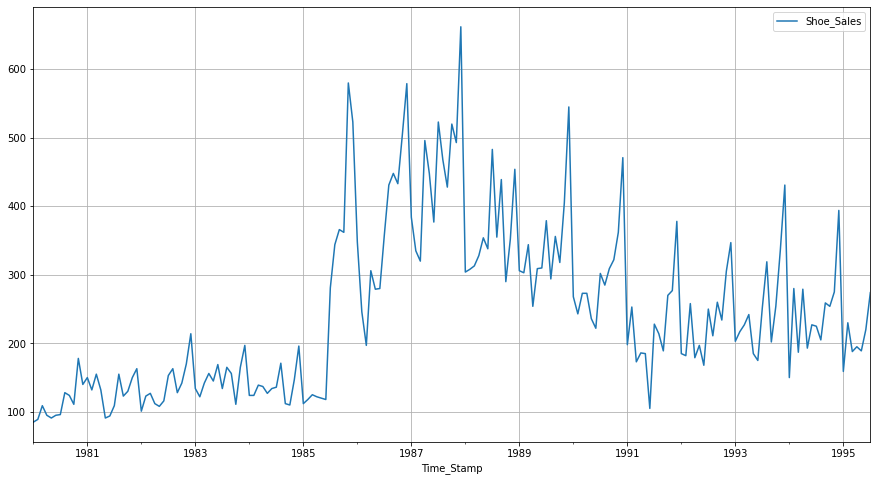

In [11]:
rcParams['figure.figsize'] = 15,8

shoe.plot()
plt.grid();

## 2.	Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [12]:
shoe.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


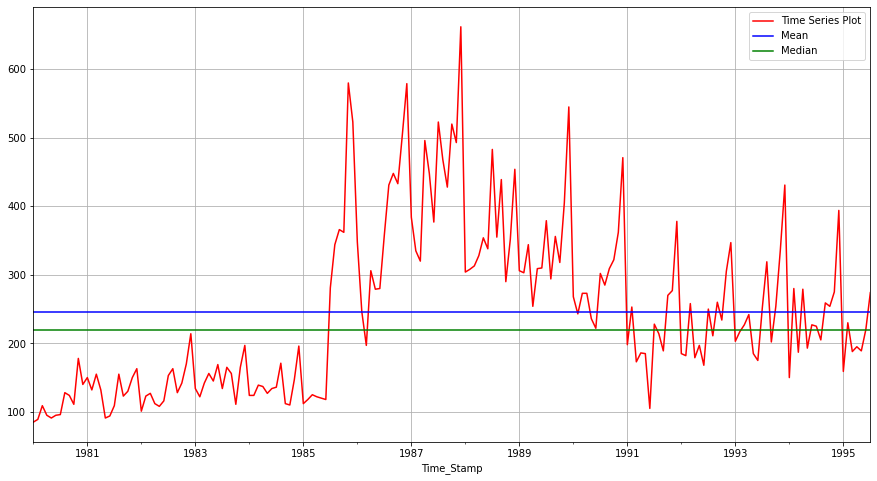

In [13]:
shoe.plot(color='Red')
plt.axhline(shoe['Shoe_Sales'].mean(),color='Blue')
plt.axhline(shoe['Shoe_Sales'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

C:\Users\shpar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


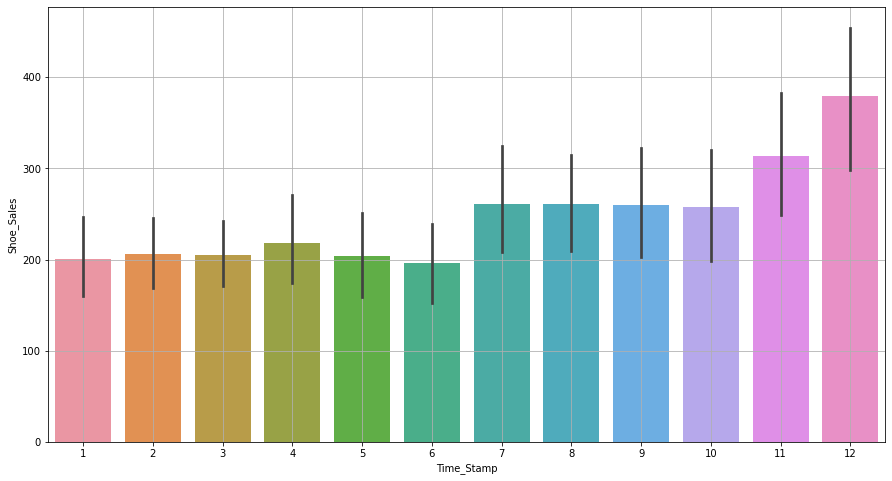

In [14]:
sns.barplot(shoe.index.month,shoe.Shoe_Sales,data=shoe)
plt.grid();

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

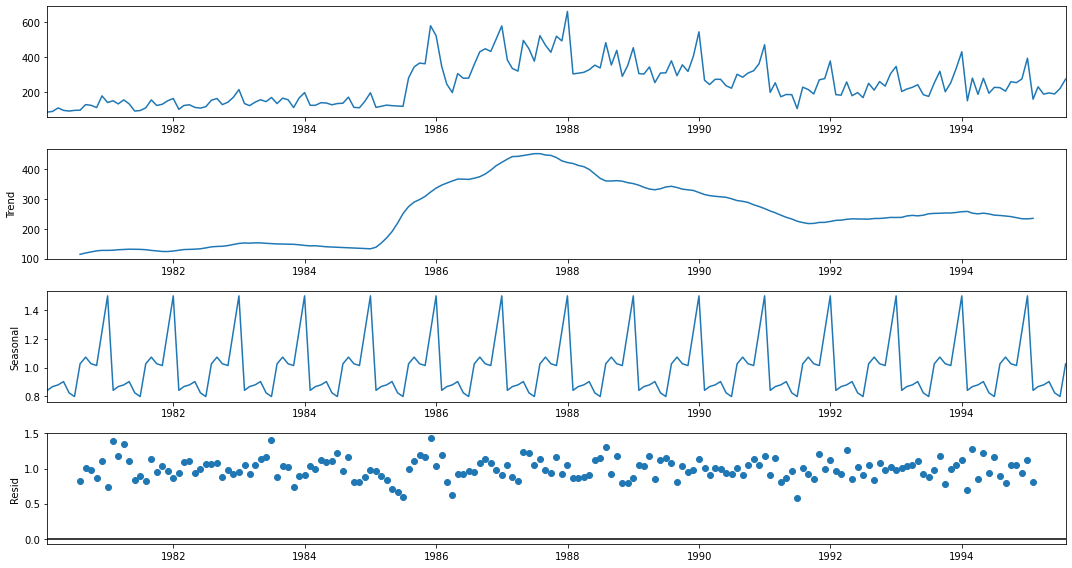

In [16]:
decomposition = seasonal_decompose(shoe,model='multiplicative')
decomposition.plot();

In [17]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [18]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.840405
1980-02-29    0.866682
1980-03-31    0.878675
1980-04-30    0.901826
1980-05-31    0.823141
                ...   
1995-03-31    0.878675
1995-04-30    0.901826
1995-05-31    0.823141
1995-06-30    0.797254
1995-07-31    1.025527
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



## 3.	Split the data into training and test. The test data should start in 1991.

In [19]:
train    =   shoe[0:int(len(shoe)*0.71)] 
test     =   shoe[int(len(shoe)*0.71):]

In [20]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [21]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91 

Last few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1990-08-31         285
1990-09-30         309
1990-10-31         322
1990-11-30         362
1990-12-31         471 

First few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1991-01-31         198
1991-02-28         253
1991-03-31         173
1991-04-30         186
1991-05-31         185 

Last few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1995-03-31         188
1995-04-30         195
1995-05-31         189
1995-06-30         220
1995-07-31         274 



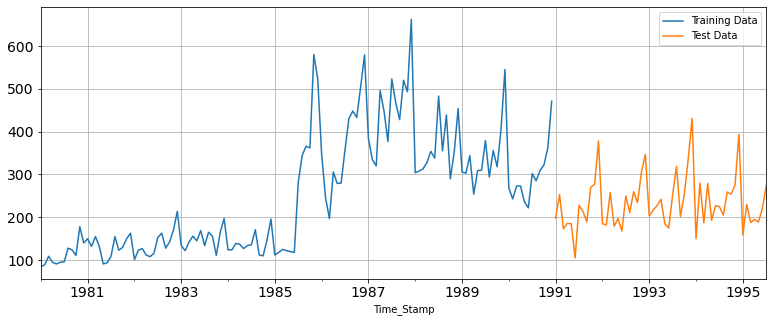

In [22]:
train['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
test['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 4.	Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

In [23]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


## Model 1 Linear Regression

In [24]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [25]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1980-01-31          85     1
1980-02-29          89     2
1980-03-31         109     3
1980-04-30          95     4
1980-05-31          91     5 

Last few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1990-08-31         285   128
1990-09-30         309   129
1990-10-31         322   130
1990-11-30         362   131
1990-12-31         471   132 

First few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1991-01-31         198   133
1991-02-28         253   134
1991-03-31         173   135
1991-04-30         186   136
1991-05-31         185   137 

Last few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1995-03-31         188   183
1995-04-30         195   184
1995-05-31         189   185
1995-06-30         220   186
1995-07-31         274   187 



In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

In [29]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [30]:
from sklearn import metrics

In [31]:
rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276


In [32]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,266.276472


## Model 2 -Simple Exponential Smoothing model

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [34]:
SES_train = train.copy()
SES_test = test.copy()

In [35]:
model_SES = SimpleExpSmoothing(SES_train['Shoe_Sales'])

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [36]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [37]:
model_SES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.605049,True
initial_level,l.0,88.827639,True


In [38]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-01-31    420.229797
1991-02-28    420.229797
1991-03-31    420.229797
1991-04-30    420.229797
1991-05-31    420.229797
1991-06-30    420.229797
1991-07-31    420.229797
1991-08-31    420.229797
1991-09-30    420.229797
1991-10-31    420.229797
1991-11-30    420.229797
1991-12-31    420.229797
1992-01-31    420.229797
1992-02-29    420.229797
1992-03-31    420.229797
1992-04-30    420.229797
1992-05-31    420.229797
1992-06-30    420.229797
1992-07-31    420.229797
1992-08-31    420.229797
1992-09-30    420.229797
1992-10-31    420.229797
1992-11-30    420.229797
1992-12-31    420.229797
1993-01-31    420.229797
1993-02-28    420.229797
1993-03-31    420.229797
1993-04-30    420.229797
1993-05-31    420.229797
1993-06-30    420.229797
1993-07-31    420.229797
1993-08-31    420.229797
1993-09-30    420.229797
1993-10-31    420.229797
1993-11-30    420.229797
1993-12-31    420.229797
1994-01-31    420.229797
1994-02-28    420.229797
1994-03-31    420.229797
1994-04-30    420.229797


In [39]:
rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 196.405


In [40]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.995:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
Alpha=0.995:SimpleExponentialSmoothing,196.404780


## Model 3: Double Exponential Smoothing model

In [41]:
DES_train = train.copy()
DES_test = test.copy()

In [42]:
model_DES = Holt(SES_train['Shoe_Sales'])

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [43]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [44]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.594345,True
smoothing_trend,beta,0.001033,True
initial_level,l.0,84.989820,True
initial_trend,b.0,2.324449,True


In [45]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-01-31    422.462956
1991-02-28    424.815181
1991-03-31    427.167405
1991-04-30    429.519629
1991-05-31    431.871853
1991-06-30    434.224078
1991-07-31    436.576302
1991-08-31    438.928526
1991-09-30    441.280750
1991-10-31    443.632974
1991-11-30    445.985199
1991-12-31    448.337423
1992-01-31    450.689647
1992-02-29    453.041871
1992-03-31    455.394096
1992-04-30    457.746320
1992-05-31    460.098544
1992-06-30    462.450768
1992-07-31    464.802993
1992-08-31    467.155217
1992-09-30    469.507441
1992-10-31    471.859665
1992-11-30    474.211889
1992-12-31    476.564114
1993-01-31    478.916338
1993-02-28    481.268562
1993-03-31    483.620786
1993-04-30    485.973011
1993-05-31    488.325235
1993-06-30    490.677459
1993-07-31    493.029683
1993-08-31    495.381907
1993-09-30    497.734132
1993-10-31    500.086356
1993-11-30    502.438580
1993-12-31    504.790804
1994-01-31    507.143029
1994-02-28    509.495253
1994-03-31    511.847477
1994-04-30    514.199701


In [46]:
rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 260.912


In [47]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
Alpha=0.995:SimpleExponentialSmoothing,196.404780
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",260.912068


## Model 4: Triple Exponential Smoothing model

In [48]:
TES_train = train.copy()
TES_test = test.copy()

In [49]:
model_TES = ExponentialSmoothing(SES_train['Shoe_Sales'],trend='additive',seasonal='multiplicative')

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [50]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [51]:
model_TES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.537353,True
smoothing_trend,beta,0.000110,True
smoothing_seasonal,gamma,0.242450,True
initial_level,l.0,210.407325,True
initial_trend,b.0,0.040627,True
initial_seasons.0,s.0,0.513044,True
initial_seasons.1,s.1,0.475911,True
initial_seasons.2,s.2,0.604044,True
initial_seasons.3,s.3,0.664086,True
initial_seasons.4,s.4,0.573571,True


In [52]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-01-31    260.407369
1991-02-28    244.007011
1991-03-31    259.428593
1991-04-30    269.297217
1991-05-31    266.805447
1991-06-30    255.675026
1991-07-31    340.616768
1991-08-31    313.236466
1991-09-30    340.969820
1991-10-31    315.472927
1991-11-30    371.396593
1991-12-31    464.282758
1992-01-31    260.866118
1992-02-29    244.436804
1992-03-31    259.885483
1992-04-30    269.771418
1992-05-31    267.275192
1992-06-30    256.125107
1992-07-31    341.216290
1992-08-31    313.787715
1992-09-30    341.569788
1992-10-31    316.027949
1992-11-30    372.049907
1992-12-31    465.099346
1993-01-31    261.324867
1993-02-28    244.866598
1993-03-31    260.342374
1993-04-30    270.245618
1993-05-31    267.744936
1993-06-30    256.575189
1993-07-31    341.815812
1993-08-31    314.338964
1993-09-30    342.169755
1993-10-31    316.582972
1993-11-30    372.703222
1993-12-31    465.915935
1994-01-31    261.783615
1994-02-28    245.296392
1994-03-31    260.799264
1994-04-30    270.719819


In [53]:
rmse_model4_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 80.808


In [54]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
Alpha=0.995:SimpleExponentialSmoothing,196.404780
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",260.912068
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",80.808109


## Model 5: Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE 

In [55]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [56]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [57]:
resultsDf_model

,Alpha Values,Test RMSE
0,0.01,61.759922
1,0.02,87.480665
2,0.03,108.145231
3,0.04,116.761752
4,0.05,119.291129
...,...,...
94,0.95,239.752611
95,0.96,240.841659
96,0.97,241.922972
97,0.98,242.996634


In [58]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
0,0.01,61.759922
1,0.02,87.480665
2,0.03,108.145231
10,0.11,115.748880
9,0.10,115.874445
...,...,...
94,0.95,239.752611
95,0.96,240.841659
96,0.97,241.922972
97,0.98,242.996634


In [59]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.01,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
Alpha=0.995:SimpleExponentialSmoothing,196.404780
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",260.912068
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",80.808109
"Alpha=0.01,SimpleExponentialSmoothing",61.759922


## Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE.

In [60]:
DES_train = train.copy()
DES_test = test.copy()

In [61]:
model_DES = Holt(DES_train['Shoe_Sales'])

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [62]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [63]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [64]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE
0,0.01,0.01,360.751020
1,0.01,0.02,324.056127
2,0.01,0.03,297.407439
3,0.01,0.04,278.993090
4,0.01,0.05,267.225473
...,...,...,...
9796,0.99,0.95,3584.634187
9797,0.99,0.96,3607.629614
9798,0.99,0.97,3630.466547
9799,0.99,0.98,3653.144603


In [65]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
418,0.05,0.23,60.985809
513,0.06,0.19,63.064114
324,0.04,0.28,65.082707
610,0.07,0.17,65.084994
325,0.04,0.29,65.689104
...,...,...,...
9700,0.98,0.98,3637.905603
9602,0.97,0.99,3644.749959
9799,0.99,0.98,3653.144603
9701,0.98,0.99,3660.452588


In [66]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.05&Beta=0.23,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
Alpha=0.995:SimpleExponentialSmoothing,196.404780
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",260.912068
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",80.808109
"Alpha=0.01,SimpleExponentialSmoothing",61.759922
"Alpha=0.05&Beta=0.23,DoubleExponentialSmoothing",60.985809


## Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE.

In [67]:
TES_train = train.copy()
TES_test = test.copy()

In [68]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [69]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [70]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.1,0.1,0.1,119.450622
1,0.1,0.1,0.2,107.471692
2,0.1,0.1,0.3,98.059131
3,0.1,0.1,0.4,89.499787
4,0.1,0.1,0.5,81.834527
...,...,...,...,...
995,1.0,1.0,0.6,46623.456934
996,1.0,1.0,0.7,676206.932509
997,1.0,1.0,0.8,15593.145972
998,1.0,1.0,0.9,95427.989788


In [71]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
51,0.1,0.6,0.2,4.167064e+01
91,0.1,1.0,0.2,4.380366e+01
44,0.1,0.5,0.5,4.384820e+01
37,0.1,0.4,0.8,4.512928e+01
113,0.2,0.2,0.4,4.701792e+01
...,...,...,...,...
384,0.4,0.9,0.5,3.157562e+06
172,0.2,0.8,0.3,4.415493e+06
967,1.0,0.7,0.8,4.647402e+06
984,1.0,0.9,0.5,5.122393e+06


In [72]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.1,Beta=0.6,Gamma=0.2:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
Alpha=0.995:SimpleExponentialSmoothing,196.404780
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",260.912068
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",80.808109
"Alpha=0.01,SimpleExponentialSmoothing",61.759922
"Alpha=0.05&Beta=0.23,DoubleExponentialSmoothing",60.985809
"Alpha=0.1,Beta=0.6,Gamma=0.2:DoubleExponentialSmoothing",41.670638


In [73]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.1,Beta=0.6,Gamma=0.2:DoubleExponentialSmoothing",41.670638
"Alpha=0.05&Beta=0.23,DoubleExponentialSmoothing",60.985809
"Alpha=0.01,SimpleExponentialSmoothing",61.759922
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",80.808109
Alpha=0.995:SimpleExponentialSmoothing,196.404780
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",260.912068
RegressionOnTime,266.276472


KeyError: ('predict', 1.0000000000000002, 0.7000000000000002, 0.3)

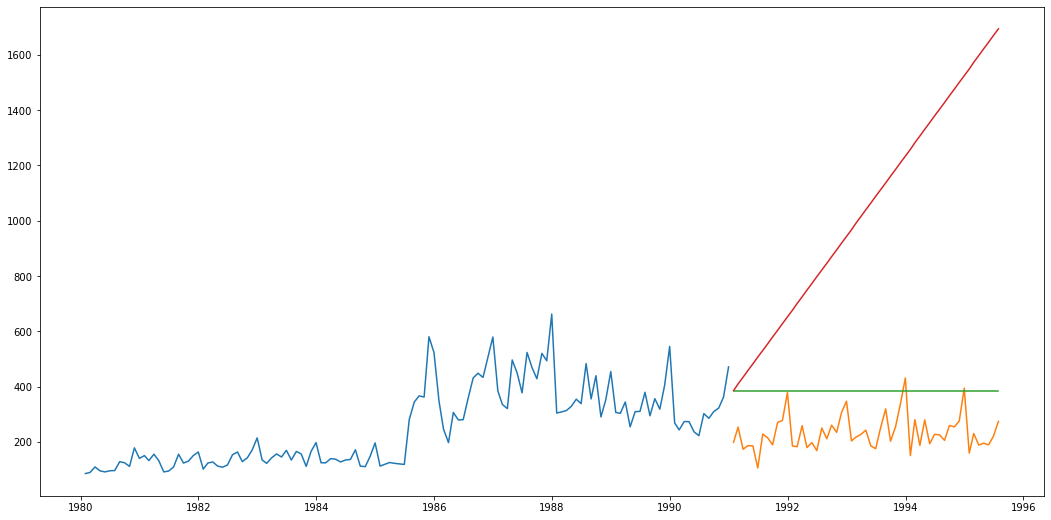

In [74]:
plt.figure(figsize=(18,9))
plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## Check for stationarity of the whole Time Series data.

In [75]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

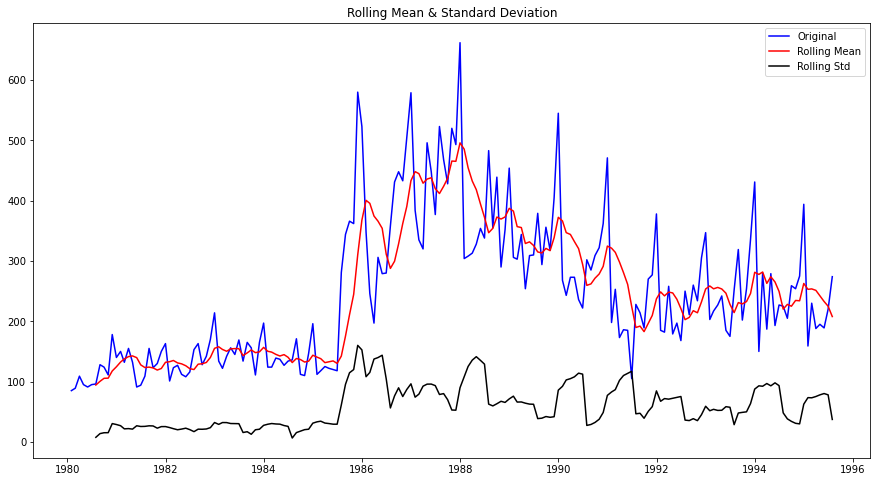

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [76]:
test_stationarity(shoe['Shoe_Sales'])

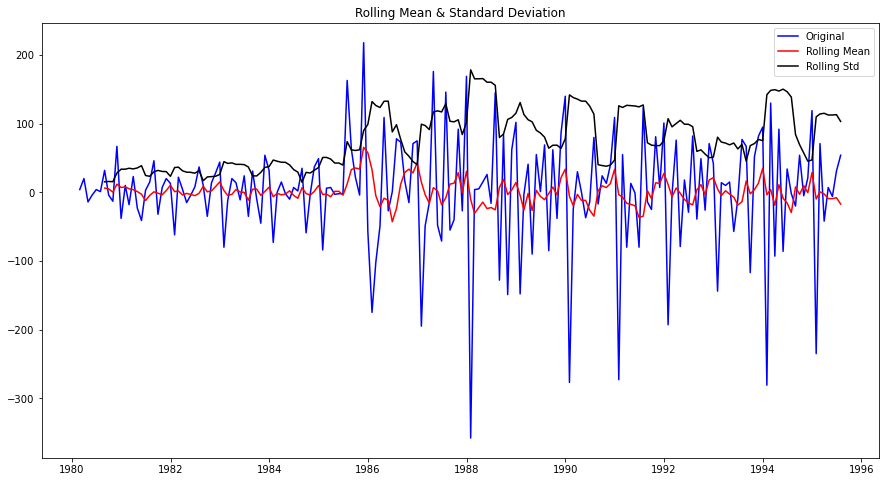

Results of Dickey-Fuller Test:
Test Statistic                  -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [77]:
test_stationarity(shoe['Shoe_Sales'].diff().dropna())

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [78]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [79]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [80]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1510.0865140837898
ARIMA(0, 1, 1) - AIC:1498.607870797768
ARIMA(0, 1, 2) - AIC:1496.1350959083456
ARIMA(1, 1, 0) - AIC:1503.3488365273843
ARIMA(1, 1, 1) - AIC:1493.2550621431837


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

ARIMA(1, 1, 2) - AIC:1495.1540870185304
ARIMA(2, 1, 0) - AIC:1500.5665891279423
ARIMA(2, 1, 1) - AIC:1495.1680882178266


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

ARIMA(2, 1, 2) - AIC:1497.1346012164927


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [81]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
4,"(1, 1, 1)",1493.255062
5,"(1, 1, 2)",1495.154087
7,"(2, 1, 1)",1495.168088
2,"(0, 1, 2)",1496.135096
8,"(2, 1, 2)",1497.134601
1,"(0, 1, 1)",1498.607871
6,"(2, 1, 0)",1500.566589
3,"(1, 1, 0)",1503.348837
0,"(0, 1, 0)",1510.086514


In [82]:
auto_ARIMA = ARIMA(train['Shoe_Sales'], order=(1,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Shoe_Sales   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -742.628
Method:                       css-mle   S.D. of innovations             69.968
Date:                Mon, 16 May 2022   AIC                           1493.255
Time:                        21:37:54   BIC                           1504.756
Sample:                    02-29-1980   HQIC                          1497.928
                         - 12-31-1990                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0863      1.798      1.160      0.246      -1.438       5.611
ar.L1.D.Shoe_Sales     0.4827      0.119      4.064      0.000       0.250       0.716
ma.L1.D.Shoe_Sales  

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [83]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [84]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

203.24301513647524


In [85]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])

resultsDf

,RMSE
"ARIMA(1,1,1)",203.243015


## Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE

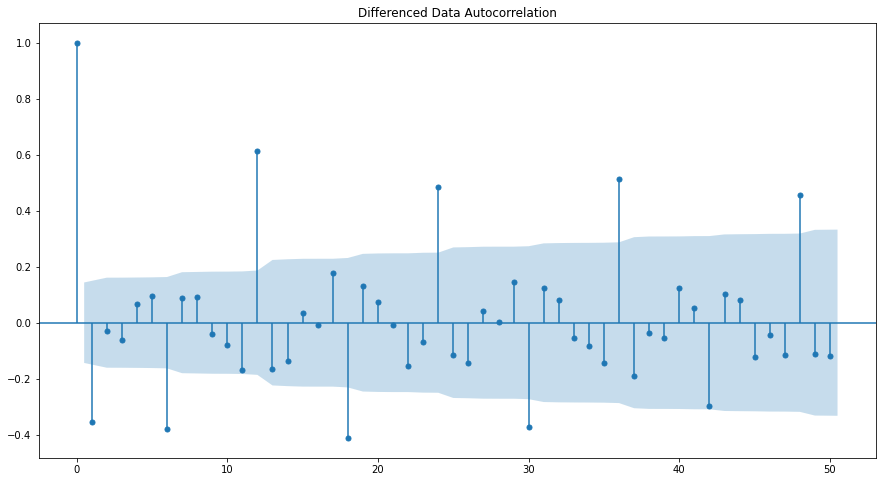

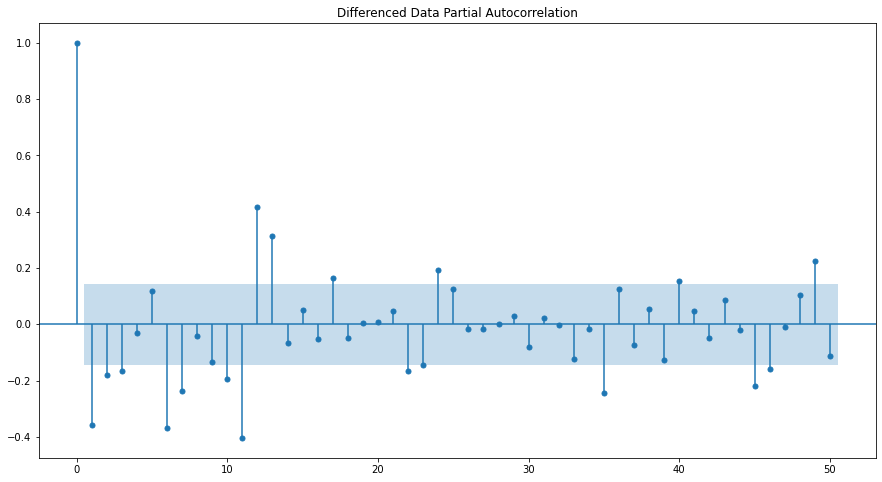

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(shoe['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(shoe['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [87]:
manual_ARIMA = ARIMA(train['Shoe_Sales'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Shoe_Sales   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -753.043
Method:                           css   S.D. of innovations             75.905
Date:                Mon, 16 May 2022   AIC                           1510.087
Time:                        21:37:54   BIC                           1515.837
Sample:                    02-29-1980   HQIC                          1512.423
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9466      6.632      0.444      0.657     -10.052      15.945


C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [88]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [89]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

327.57538910744256


In [90]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,1)",203.243015
"ARIMA(0,1,0)",327.575389


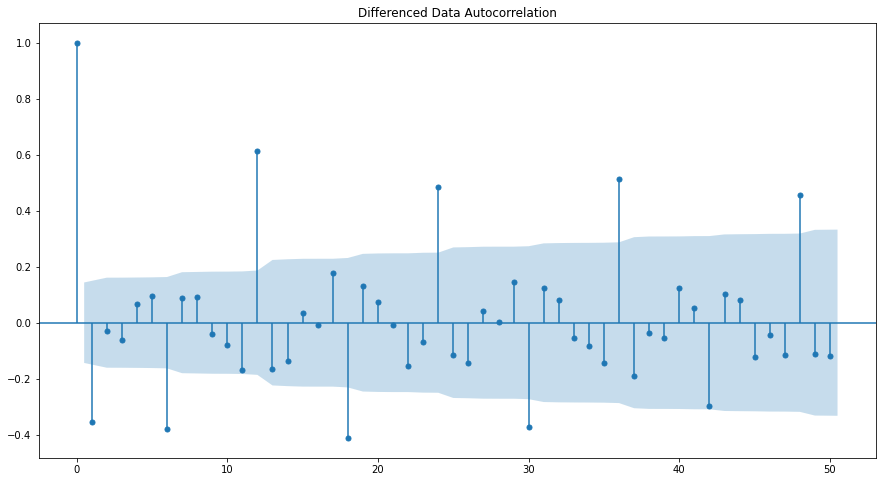

In [91]:
plot_acf(shoe['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [92]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [93]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [94]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1426.336115722151
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1334.5305386143448
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1426.0492095804898
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1385.5711563547861
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1319.606107603825
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1323.6330116787822
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1322.9358084091696
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1312.671807677896
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1476.0167777381948
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1405.250994783238
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1312.4363431163897
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1414.5028237538593
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1363.4568516025056
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1299.1891899949565
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1309.8511217450084
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1311.008603881374
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1288.9756630622558
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [95]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
80,"(2, 1, 2)","(2, 0, 2, 6)",1280.778665
26,"(0, 1, 2)","(2, 0, 2, 6)",1281.026602
53,"(1, 1, 2)","(2, 0, 2, 6)",1282.065372
17,"(0, 1, 1)","(2, 0, 2, 6)",1288.975663
50,"(1, 1, 2)","(1, 0, 2, 6)",1289.791748


In [96]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -631.389
Date:                           Mon, 16 May 2022   AIC                           1280.779
Time:                                   21:38:03   BIC                           1305.561
Sample:                                        0   HQIC                          1290.839
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0601      0.474      0.127      0.899      -0.869       0.989
ar.L2          0.3977      0.161      2.464

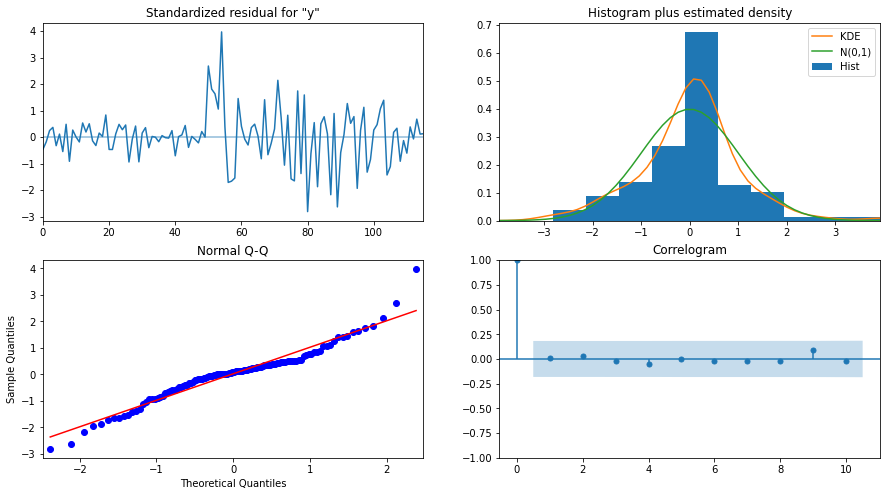

In [97]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [98]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [99]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,257.243072,55.501873,148.461400,366.024744
1,257.175851,64.584694,130.592177,383.759524
2,265.714972,73.831689,121.007521,410.422423
3,263.008113,78.614884,108.925772,417.090455
4,240.045674,83.309133,76.762773,403.328574


In [100]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

57.03162413661246


In [101]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,1)",203.243015
"ARIMA(0,1,0)",327.575389
"SARIMA(0,1,2)(2,0,2,6)",57.031624


In [102]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [103]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [104]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373174
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347135
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.3970510547892
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.586797868653
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.084399500872
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.06008315672
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.7545174421311
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.0396305010834
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.0167777381948
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.386120638772
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1185.4842426144012
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1313.5738277003436
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1287.7675669260593
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1164.2974585339891
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1188.1632556767747
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1188.209137191892
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1165.875706049739
SARIMA(0, 1, 2)x(

In [105]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
23,"(0, 1, 2)","(1, 0, 2, 12)",1156.165429
50,"(1, 1, 2)","(1, 0, 2, 12)",1157.082589
26,"(0, 1, 2)","(2, 0, 2, 12)",1157.772313
77,"(2, 1, 2)","(1, 0, 2, 12)",1158.491001
80,"(2, 1, 2)","(2, 0, 2, 12)",1158.630326


In [106]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -572.083
Date:                            Mon, 16 May 2022   AIC                           1156.165
Time:                                    21:38:20   BIC                           1172.032
Sample:                                         0   HQIC                          1162.593
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3742      0.081     -4.632      0.000      -0.533      -0.216
ma.L2          0.0616      0.077   

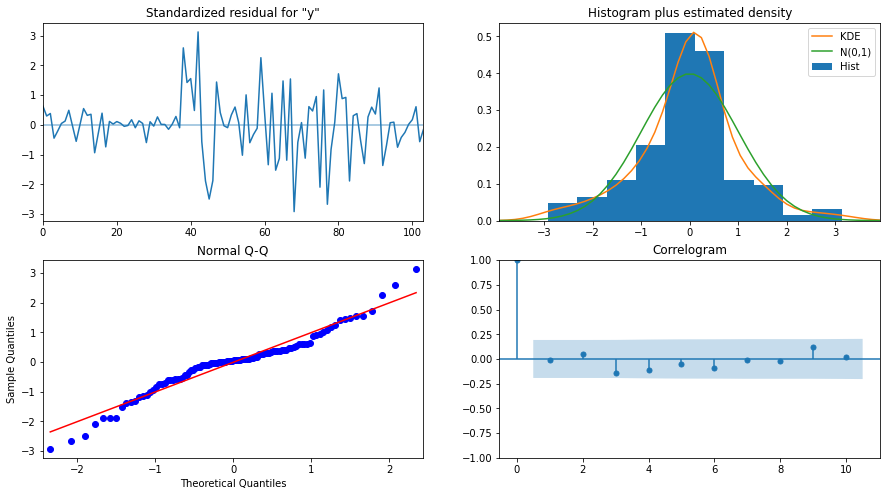

In [107]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [108]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [109]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,225.292057,55.845595,115.836702,334.747413
1,199.179250,65.878239,70.060274,328.298227
2,213.554157,76.229351,64.147374,362.960940
3,238.613120,85.270213,71.486574,405.739665
4,215.720839,93.440558,32.580711,398.860967


In [110]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

69.03065174108744


In [111]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,1)",203.243015
"ARIMA(0,1,0)",327.575389
"SARIMA(0,1,2)(2,0,2,6)",57.031624
"SARIMA(1,1,2)(2,0,2,12)",69.030652


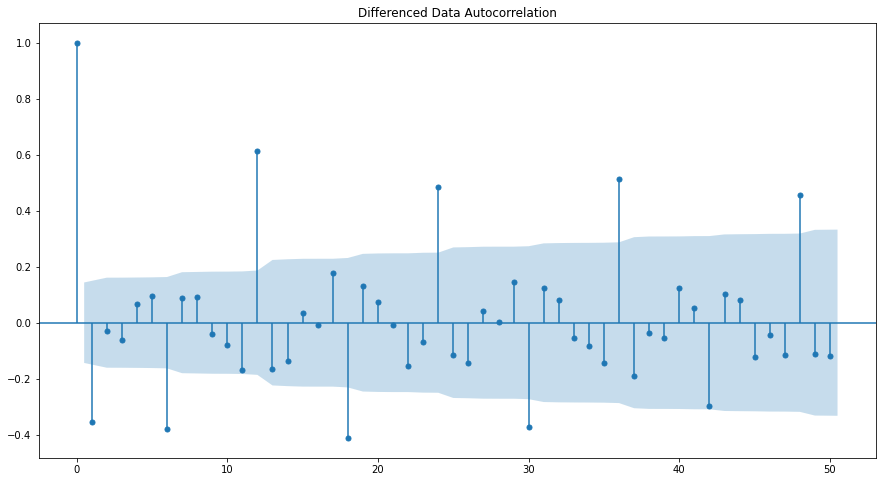

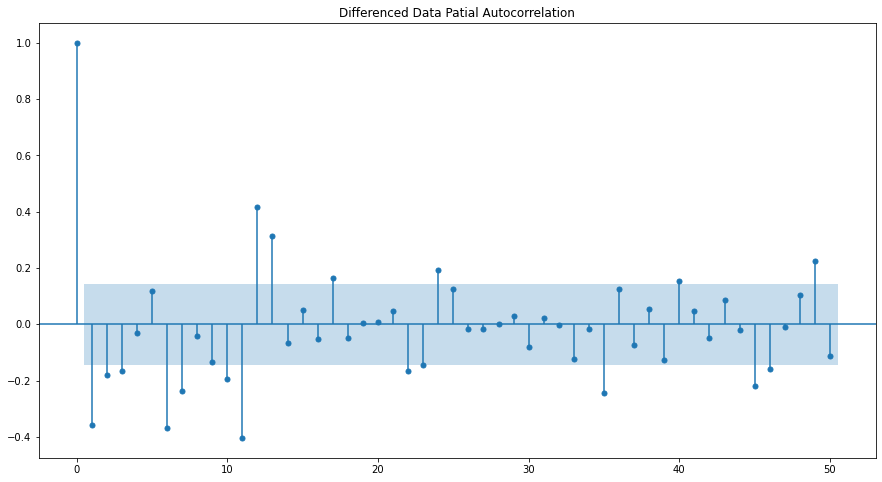

In [112]:
plot_acf(shoe['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(shoe['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

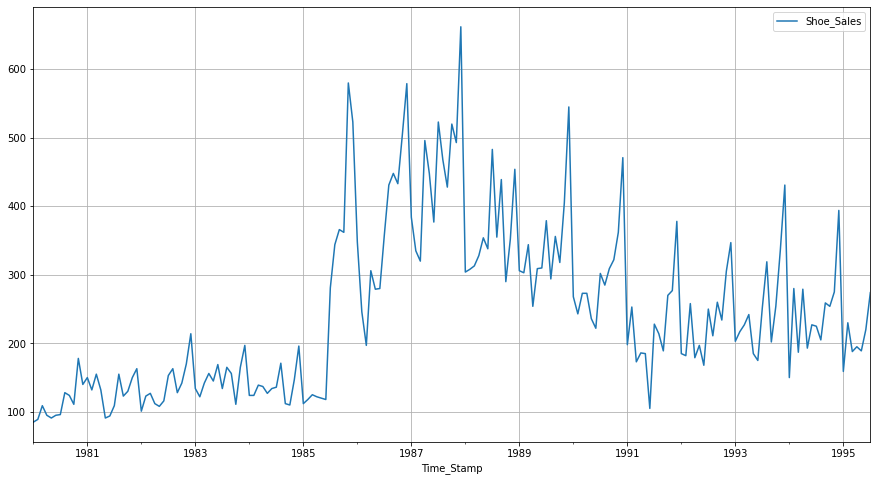

In [113]:
shoe.plot()
plt.grid();

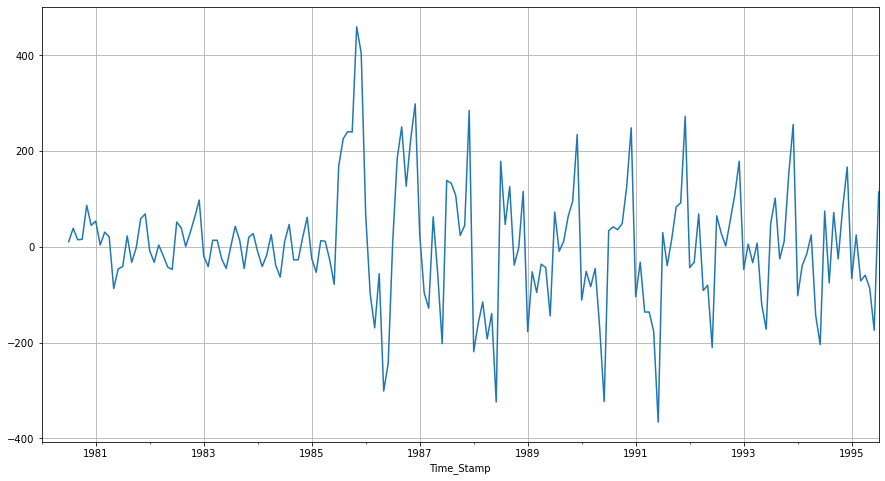

In [114]:
(shoe['Shoe_Sales'].diff(6)).plot()
plt.grid();

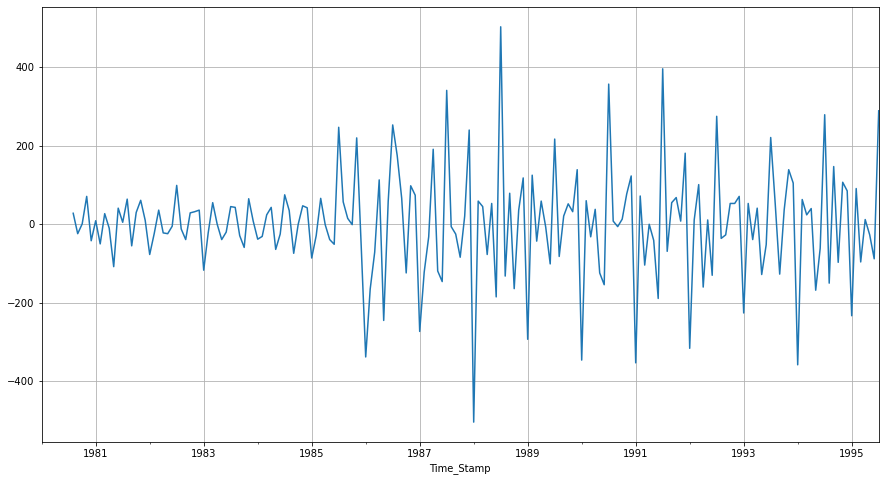

In [115]:
(shoe['Shoe_Sales'].diff(6)).diff().plot()
plt.grid();

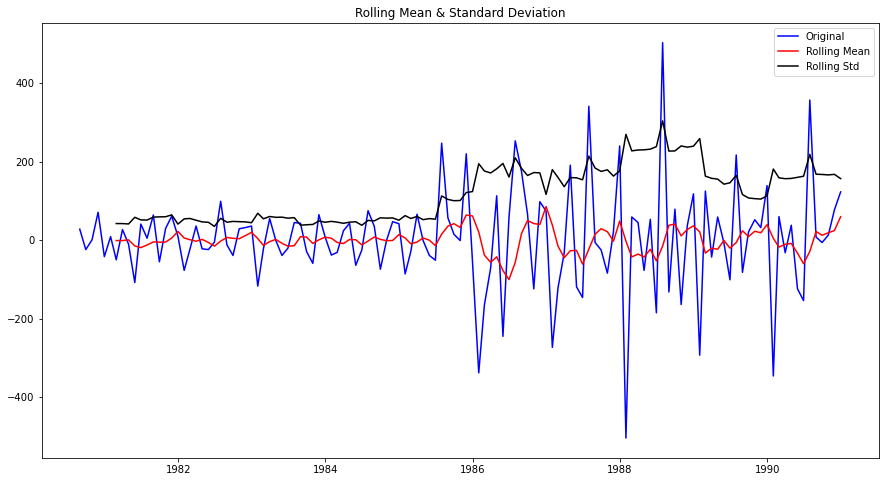

Results of Dickey-Fuller Test:
Test Statistic                -1.133336e+01
p-value                        1.098825e-20
#Lags Used                     6.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [116]:
test_stationarity((train['Shoe_Sales'].diff(6).dropna()).diff(1).dropna())

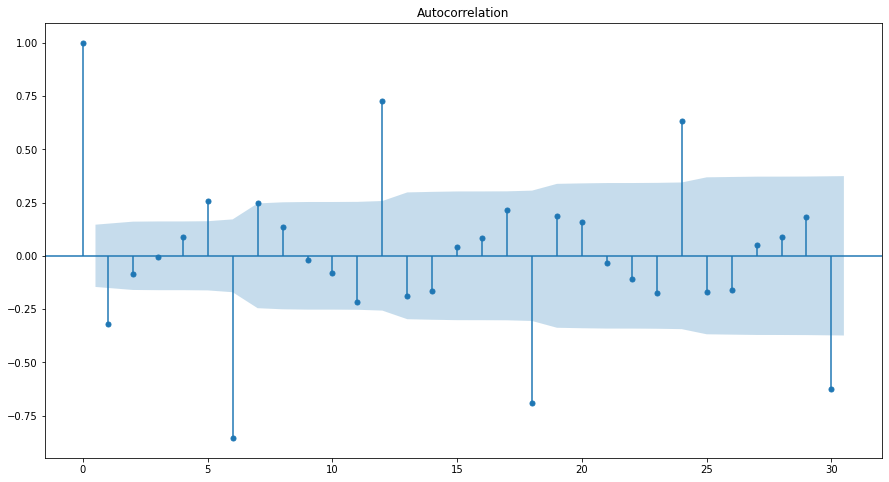

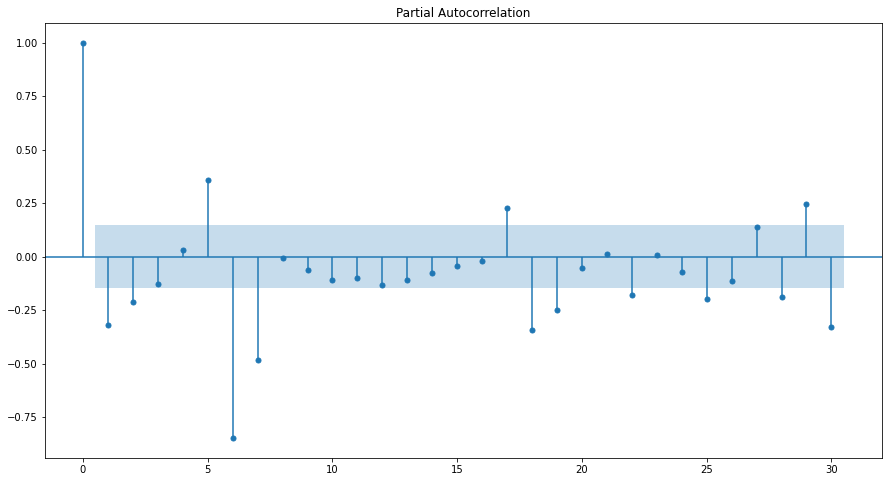

In [117]:
plot_acf((shoe['Shoe_Sales'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((shoe['Shoe_Sales'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [118]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -589.644
Date:                                   Mon, 16 May 2022   AIC                           1189.288
Time:                                           21:44:00   BIC                           1202.605
Sample:                                                0   HQIC                          1194.685
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.9858      0.047    -20.957      0.000    

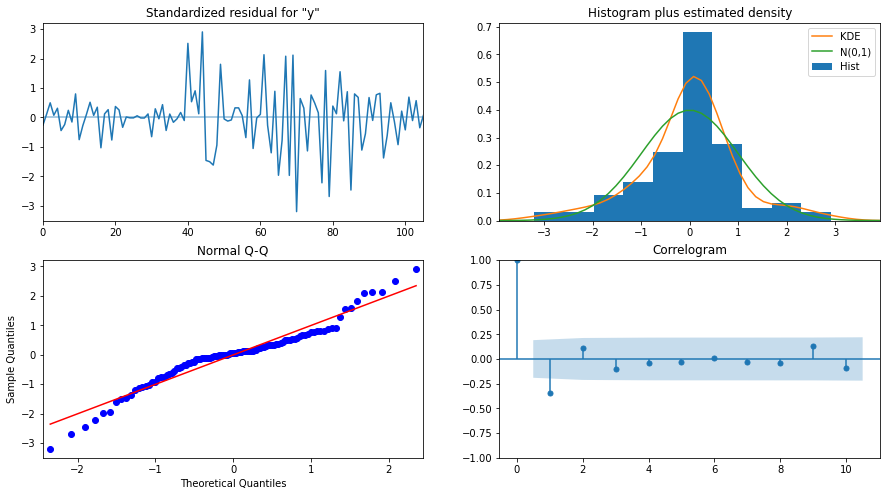

In [119]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [120]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [121]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,254.891339,61.960158,133.451660,376.331018
1,248.921476,87.620862,77.187743,420.655208
2,259.292717,107.311554,48.965936,469.619497
3,260.773842,123.911758,17.911259,503.636424
4,256.434382,138.536919,-15.092989,527.961753


In [122]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

70.5314847212343


In [123]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(1,1,1)",203.243015
"ARIMA(0,1,0)",327.575389
"SARIMA(0,1,2)(2,0,2,6)",57.031624
"SARIMA(1,1,2)(2,0,2,12)",69.030652
"SARIMA(0,1,0)(1,1,3,6)",70.531485


In [124]:
full_data_model = sm.tsa.statespace.SARIMAX(shoe['Shoe_Sales'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\shpar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -923.680
Date:                           Mon, 16 May 2022   AIC                           1861.361
Time:                                   21:48:31   BIC                           1883.353
Sample:                               01-31-1980   HQIC                          1870.284
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5014      0.058     -8.588      0.000      -0.616      -0.387
ma.L2          0.0711      0.055      1.299

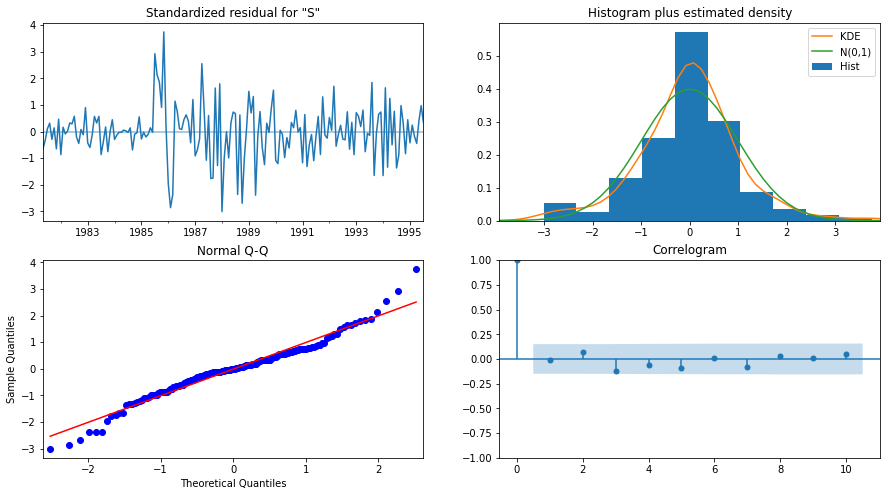

In [125]:
results_full_data_model.plot_diagnostics();

In [126]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [127]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,250.718788,52.738744,147.352749,354.084826
1995-09-30,263.737118,58.931021,148.234440,379.239797
1995-10-31,269.341350,66.148684,139.692312,398.990388
1995-11-30,315.443376,72.652815,173.046474,457.840277
1995-12-31,397.803142,78.620702,243.709398,551.896886


In [129]:
rmse = mean_squared_error(shoe['Shoe_Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 51.567570424149


In [130]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

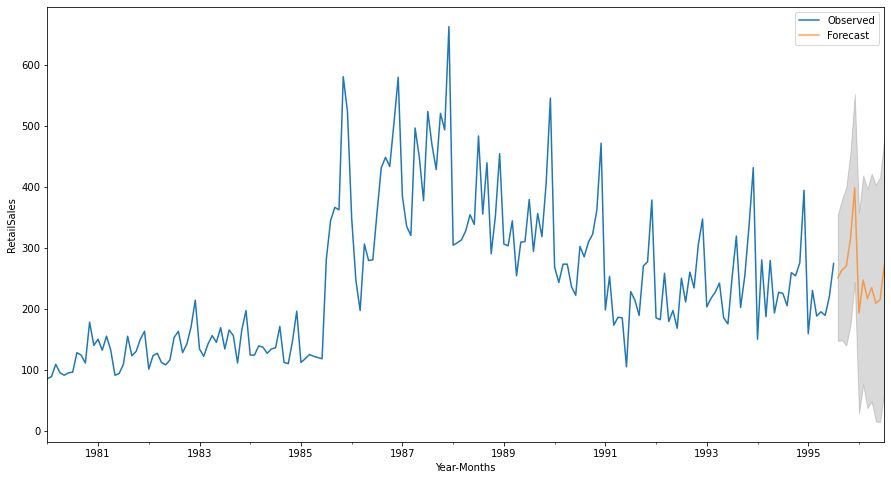

In [131]:
# plot the forecast along with the confidence band

axis = shoe['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [132]:
resultsDf

,RMSE
"ARIMA(1,1,1)",203.243015
"ARIMA(0,1,0)",327.575389
"SARIMA(0,1,2)(2,0,2,6)",57.031624
"SARIMA(1,1,2)(2,0,2,12)",69.030652
"SARIMA(0,1,0)(1,1,3,6)",70.531485
